> **ALGORITMO DE MACHINE LEARNING: K-NEAREST NEIGHBORS**
---

Aplicación del algoritmo de K-NEAREST NEIGHBORS para clasificar imágenes según el orden de dos muestras de sangre (Naranja a la izquierda y verde a la derecha, o verde a la izquierida y naranja a la derecha).

> Importación y Análisis de Data
---

In [45]:
#IMPORTAR LIBRERÍA
import pandas as pd                                     # LIBRERÍA PARA DATAFRAMES
import numpy as np                                      # LIBRERÍA PARA MATRICES
import os                                               # LIBRERÍA PARA OPERACIONES CON EL SISTEMA OPERATIVO
import matplotlib.pyplot as plt                         # LIBRERÍA PARA GRÁFICAS 2D
from sklearn import model_selection                     # LIBRERÍA PARA SEPARAR DATA EN ENTRENAMIENTO Y VALIDACIÓN
from sklearn import preprocessing, neighbors            # LIBRERÍA PARA IMPLEMENTAR ALGORITMO K-NEAREST NEIGHBORS
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold               # LIBRERÍA PARA DIVIDIR LA DATA EN N-FOLD O SUBCONJUNTOS DE TESTING DIFERENTES
from sklearn.model_selection import cross_val_score     # LIBRERÍA PARA OBTENER LA CORRELACIÓN POR VALIDACIÓN CRUZADA
from sklearn.metrics import balanced_accuracy_score     # LIBRERÍA PARA HALLAR LA EXACTITUD BALANCEADA
from sklearn.metrics import roc_curve                   # LIBRERÍA PARA HALLAR CURVAS ROC
from sklearn.externals import joblib                    # LIBRERÍA PARA EXPORTAR MODELO DE MACHINE LEARNING

from google.colab import drive          # LIBRERÍA PARA IMPORTAR DESDE GOOGLE DRIVE

In [46]:
%matplotlib inline

In [47]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#LEER ARCHIVO EXCEL (.xlsx)
mainpath = "drive/My Drive/DATASET"
filenameDatos = "MUESTRAS_SANGRE/caracteristicasColorMuestras.csv"
fullpathDatos = os.path.join(mainpath,filenameDatos)

data = pd.read_csv(fullpathDatos, index_col=0)

#Mostrar Datos
data

,Promedio R Total,Promedio G Total,Promedio B Total,Promedio H Total,Promedio S Total,Promedio V Total,Promedio R Mitad,Promedio G Mitad,Promedio B Mitad,Promedio H Mitad,Promedio S Mitad,Promedio V Mitad,Proporción Promedio R,Proporción Promedio G,Proporción Promedio B,Proporción Promedio H,Proporción Promedio S,Proporción Promedio V,Naranja Izquierda
0,130.088715,132.883255,127.330995,53.035849,22.351475,134.850740,138.818150,141.921115,138.391798,58.257041,20.599186,144.832839,0.937116,0.936318,0.920076,0.910377,1.085066,0.931078,1.0
1,127.253787,129.161767,155.284070,116.209076,48.825670,156.145478,135.614566,138.101916,167.697340,115.306276,51.650972,168.725975,0.938349,0.935264,0.925978,1.007830,0.945300,0.925438,1.0
2,114.223926,140.250129,130.962345,78.107398,51.328376,140.711646,121.909864,149.842051,141.763012,79.876597,51.762484,150.570577,0.936954,0.935986,0.923812,0.977851,0.991613,0.934523,1.0
3,123.948646,135.762464,128.740140,70.794565,30.376865,136.928677,132.329921,144.981746,139.743888,74.867078,29.704088,146.782077,0.936664,0.936411,0.921258,0.945603,1.022649,0.932871,1.0
4,109.043297,142.663417,132.232830,79.670291,63.463617,142.955225,116.511746,152.381289,142.971246,80.839603,63.620272,152.837351,0.935900,0.936227,0.924891,0.985535,0.997538,0.935342,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,147.112874,130.105852,95.384053,21.184491,91.546902,147.263318,156.505928,139.281360,103.836165,20.912150,88.230283,156.690312,0.939983,0.934122,0.918601,1.013023,1.037590,0.939837,0.0
82,135.937071,131.287251,120.228981,29.290419,33.272751,136.633688,144.428280,140.533156,130.551333,32.694824,28.856211,145.352517,0.941208,0.934208,0.920933,0.895873,1.153053,0.940016,0.0
83,148.001039,128.352271,102.729157,18.191841,79.896942,148.135449,157.340558,137.434038,111.561885,17.767602,76.614532,157.506491,0.940641,0.933919,0.920827,1.023877,1.042843,0.940504,0.0
84,135.471137,131.313096,121.144728,31.075513,31.173389,136.280842,143.904226,140.587654,131.554592,35.005971,26.888693,145.013230,0.941398,0.934030,0.920870,0.887720,1.159349,0.939782,0.0


In [54]:
#NORMALIZACIÓN DE DATOS
data_norm = (data-data.min())/(data.max()-data.min())
data_norm

,Promedio R Total,Promedio G Total,Promedio B Total,Promedio H Total,Promedio S Total,Promedio V Total,Promedio R Mitad,Promedio G Mitad,Promedio B Mitad,Promedio H Mitad,Promedio S Mitad,Promedio V Mitad,Proporción Promedio R,Proporción Promedio G,Proporción Promedio B,Proporción Promedio H,Proporción Promedio S,Proporción Promedio V,Naranja Izquierda
0,0.531418,0.558107,0.384971,0.290242,0.005258,0.001721,0.546296,0.550323,0.391679,0.334682,0.000697,0.017680,0.142578,0.917086,0.190610,0.500283,0.714941,0.390135,1.0
1,0.495859,0.439964,0.669346,0.749776,0.227727,0.399219,0.508745,0.435372,0.673056,0.750681,0.256849,0.426793,0.217090,0.743826,0.546975,0.819797,0.181279,0.108480,1.0
2,0.332426,0.791976,0.421914,0.472618,0.248757,0.111124,0.348108,0.788727,0.424048,0.492330,0.257769,0.115925,0.132781,0.862609,0.416171,0.721507,0.358116,0.562136,1.0
3,0.454403,0.649510,0.399307,0.419423,0.072697,0.040509,0.470245,0.642442,0.404661,0.455801,0.075805,0.051056,0.115246,0.932383,0.261955,0.615779,0.476618,0.479625,1.0
4,0.267446,0.868589,0.434839,0.483986,0.350733,0.153004,0.284834,0.865153,0.435649,0.499352,0.355586,0.154738,0.069063,0.902103,0.481338,0.746702,0.380736,0.603052,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.744951,0.469935,0.059966,0.058550,0.586723,0.233420,0.753621,0.470871,0.059895,0.062366,0.558598,0.220711,0.315829,0.556089,0.101567,0.836824,0.533668,0.827498,0.0
82,0.604773,0.507440,0.312721,0.117514,0.097032,0.035003,0.612054,0.508548,0.316399,0.148284,0.068811,0.026578,0.389885,0.570211,0.242323,0.452731,0.974535,0.836446,0.0
83,0.756091,0.414265,0.134690,0.036781,0.488826,0.249700,0.763404,0.415270,0.134073,0.039436,0.462777,0.234686,0.355633,0.522639,0.235925,0.872411,0.553724,0.860805,0.0
84,0.598929,0.508260,0.322037,0.130499,0.079390,0.028416,0.605911,0.510188,0.326032,0.165137,0.052580,0.020768,0.401355,0.540891,0.238566,0.426001,0.998574,0.824769,0.0


In [55]:
correlacion_pearson = data_norm.corr()
correlacion_pearson

,Promedio R Total,Promedio G Total,Promedio B Total,Promedio H Total,Promedio S Total,Promedio V Total,Promedio R Mitad,Promedio G Mitad,Promedio B Mitad,Promedio H Mitad,Promedio S Mitad,Promedio V Mitad,Proporción Promedio R,Proporción Promedio G,Proporción Promedio B,Proporción Promedio H,Proporción Promedio S,Proporción Promedio V,Naranja Izquierda
Promedio R Total,1.000000,-0.815545,-0.534919,-0.351984,-0.027649,-0.142335,0.999688,-0.822761,-0.536382,-0.310064,-0.079019,-0.176705,-0.054123,-0.110041,-0.402386,-0.279520,0.314509,0.540269,-0.014448
Promedio G Total,-0.815545,1.000000,-0.052632,-0.163606,-0.049607,-0.291074,-0.809708,0.999503,-0.050910,-0.196152,-0.044011,-0.274226,-0.177597,0.399764,-0.130601,0.210810,0.003131,-0.164469,0.017750
Promedio B Total,-0.534919,-0.052632,1.000000,0.844315,0.124113,0.674484,-0.542907,-0.039386,0.999919,0.819324,0.204260,0.708883,0.352951,-0.395759,0.887662,0.174929,-0.545068,-0.688359,-0.001961
Promedio H Total,-0.351984,-0.163606,0.844315,1.000000,0.028118,0.530242,-0.359047,-0.153945,0.845660,0.992910,0.119330,0.569260,0.272262,-0.349363,0.727308,0.168108,-0.738290,-0.738320,0.005402
Promedio S Total,-0.027649,-0.049607,0.124113,0.028118,1.000000,0.739780,-0.029643,-0.039956,0.114733,-0.017617,0.994504,0.717360,0.128559,-0.300262,0.372956,0.458935,-0.203129,0.155475,-0.021222
Promedio V Total,-0.142335,-0.291074,0.674484,0.530242,0.739780,1.000000,-0.149689,-0.276227,0.666930,0.502807,0.781112,0.997954,0.327358,-0.540621,0.835556,0.284243,-0.453275,-0.226043,-0.026954
Promedio R Mitad,0.999688,-0.809708,-0.542907,-0.359047,-0.029643,-0.149689,1.000000,-0.817653,-0.544373,-0.317518,-0.081489,-0.183893,-0.078673,-0.086732,-0.409197,-0.276255,0.317887,0.539737,0.007365
Promedio G Mitad,-0.822761,0.999503,-0.039386,-0.153945,-0.039956,-0.276227,-0.817653,1.000000,-0.037760,-0.186699,-0.033622,-0.259625,-0.148375,0.370734,-0.116127,0.212204,-0.003465,-0.164514,-0.008452
Promedio B Mitad,-0.536382,-0.050910,0.999919,0.845660,0.114733,0.666930,-0.544373,-0.037760,1.000000,0.821115,0.195180,0.701782,0.353109,-0.392167,0.882112,0.170789,-0.545045,-0.693328,-0.001658
Promedio H Mitad,-0.310064,-0.196152,0.819324,0.992910,-0.017617,0.502807,-0.317518,-0.186699,0.821115,1.000000,0.071405,0.539890,0.283469,-0.356098,0.694663,0.066600,-0.712239,-0.704746,-0.003833


<Figure size 1800x720 with 0 Axes>

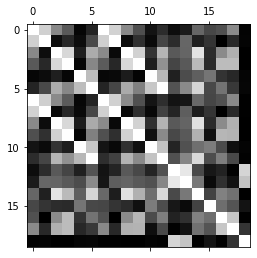

In [57]:
plt.figure(figsize = (25,10))
plt.matshow(abs(data_norm.corr()), cmap = 'gray')
plt.show()

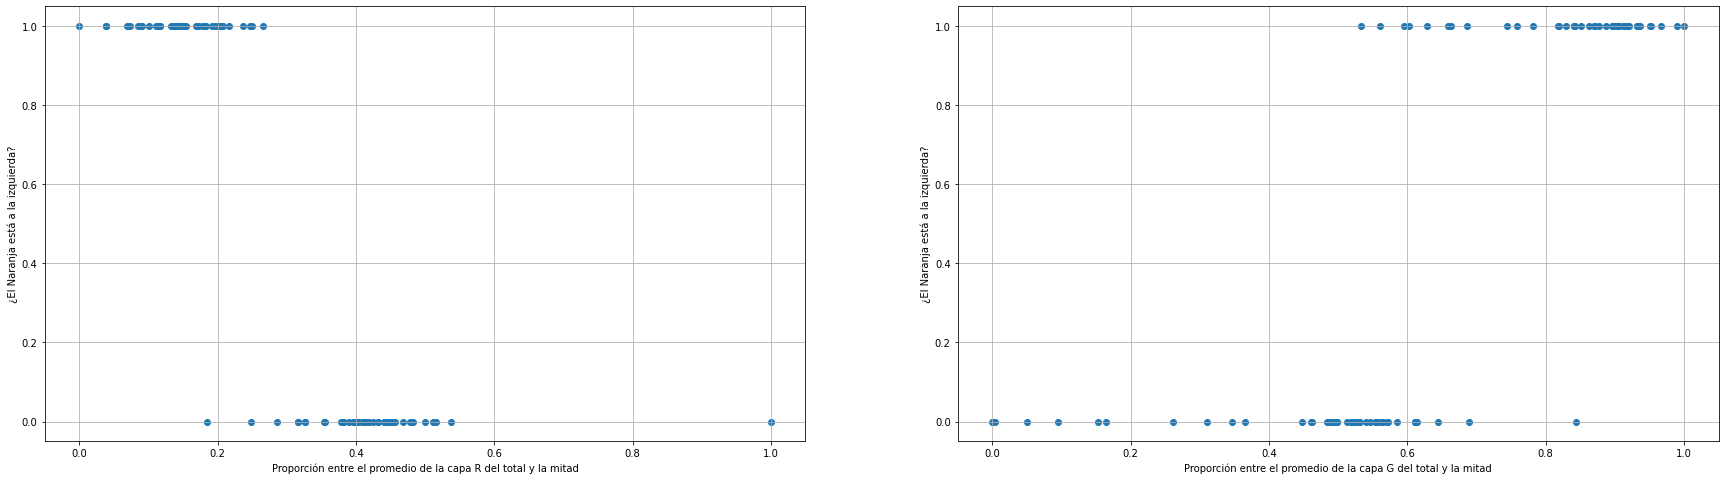

In [58]:
plt.subplots(1,2, figsize = (30,8))
plt.subplot(121)
plt.scatter(data_norm["Proporción Promedio R"], data_norm["Naranja Izquierda"])
plt.xlabel("Proporción entre el promedio de la capa R del total y la mitad")
plt.ylabel("¿El Naranja está a la izquierda?")
plt.grid()

plt.subplot(122)
plt.scatter(data_norm["Proporción Promedio G"], data_norm["Naranja Izquierda"])
plt.xlabel("Proporción entre el promedio de la capa G del total y la mitad")
plt.ylabel("¿El Naranja está a la izquierda?")
plt.grid()

plt.show()

> Separar Datos en Conjuntos de Entrenamiento y Validación
---

In [59]:
#OBTENER LA VARIABLE CARACTERÍSTICA Y LA VARIABLE OBJETIVO DEL DATASET
caracteristicas = ["Proporción Promedio R"]#["Promedio de Intensidad", "Entropía de Textura", "Correlación de Textura"]
objetivo = ["Naranja Izquierda"]

X = data[caracteristicas]
Y = data[objetivo]

In [60]:
#OBTENEMOS DATOS DE ENTRENAMIENTO Y VALIDACIÓN (75% DE DATOS PARA EL CONJUNTO DE ENTRENAMIENTO)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.2, random_state = 0)

> Entrenamiento y Validación de K Nearest Neighbors con PESOS UNIFORMES
---

In [86]:
#CREACIÓN DEL MODELO
kNN = neighbors.KNeighborsClassifier(weights = "uniform")
kNN.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [87]:
# EXACTITUD
Y_pred = kNN.predict(X_test)
ACC = balanced_accuracy_score(Y_test,Y_pred)*100

print("La exactitud es: ", ACC, "%")

La exactitud es:  100.0 %


In [88]:
filenameModelo = "MUESTRAS_SANGRE/kNN_Uniforme.pkl"
fullpathModelo = os.path.join(mainpath,filenameModelo)

joblib.dump(kNN,fullpathModelo)

['drive/My Drive/DATASET/MUESTRAS_SANGRE/kNN_Uniforme.pkl']

> Entrenamiento y Validación de K Nearest Neighbors con PESOS POR DISTANCIA
---

In [91]:
#CREACIÓN DEL MODELO
kNN = neighbors.KNeighborsClassifier(weights = "distance")
kNN.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [92]:
# EXACTITUD
Y_pred = kNN.predict(X_test)
ACC = balanced_accuracy_score(Y_test,Y_pred)*100

print("La exactitud es: ", ACC, "%")

La exactitud es:  95.0 %


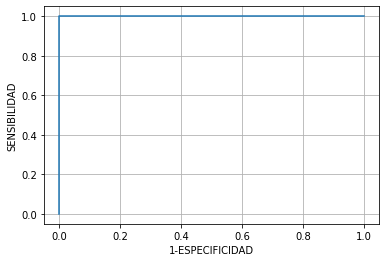

In [93]:
Y_pred_prob = kNN.predict_proba(X_test)
probs = Y_pred_prob[:,1]

espec_1, sens, umbrales = roc_curve(Y_test,probs)
plt.plot(espec_1,sens)
plt.xlabel("1-ESPECIFICIDAD")
plt.ylabel("SENSIBILIDAD")
plt.grid()
plt.show()

In [94]:
umbrales

array([2.        , 1.        , 0.49417727, 0.        ])

In [95]:
espec_1

array([0., 0., 0., 1.])

In [96]:
sens

array([0. , 0.9, 1. , 1. ])

In [97]:
Y_pred_prob = kNN.predict_proba(X_test)
probs = Y_pred_prob[:,1]
dataValidacion = pd.DataFrame({"Prob de 1": probs})

dataValidacion["Y pred"] = np.where(dataValidacion["Prob de 1"] > 0, 1, 0)
dataValidacion["Y real"] = Y_test["Naranja Izquierda"].values.tolist()
  
confMatrix = pd.crosstab(dataValidacion["Y pred"], dataValidacion["Y real"])
VP = confMatrix[1][1]
VN = confMatrix[0][0]
FP = confMatrix[0][1]
FN = confMatrix[1][0]

sensibilidad = (VP/(VP+FN))
especificidad_1 = (1-VN/(VN+FP))

print(sensibilidad,especificidad_1)

1.0 0.0


In [98]:
# EXACTITUD
ACC = balanced_accuracy_score(dataValidacion["Y real"],dataValidacion["Y pred"])*100

print("La exactitud es: ", ACC, "%")

La exactitud es:  100.0 %


In [99]:
filenameModelo = "MUESTRAS_SANGRE/kNN_Distancia.pkl"
fullpathModelo = os.path.join(mainpath,filenameModelo)

joblib.dump(kNN,fullpathModelo)

['drive/My Drive/DATASET/MUESTRAS_SANGRE/kNN_Distancia.pkl']